In [1]:
#import all the packages and install packages
#pip install pyabf
import pyabf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

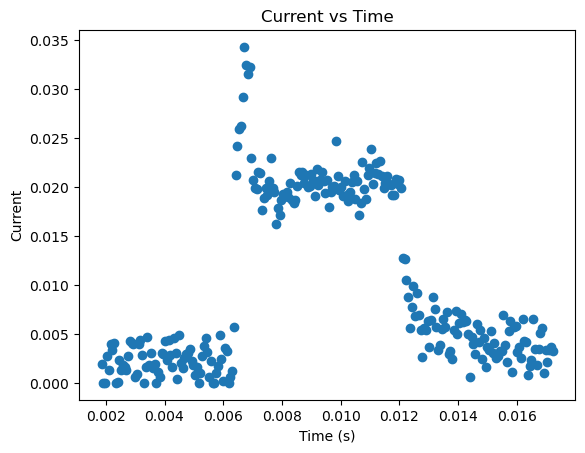

In [2]:
# Load the .mat file
mat_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\events_test1.mat')
peak_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\pkmax_test1.mat')
width_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\width_test1.mat')
area_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\area_test1.mat')

# Access the data in the .mat file
env_time = ((mat_file["Event"][0][0][0][0][2]).T)[0]
env_current = ((mat_file["Event"][0][0][0][0][1]).T)[0]

# Create a plot
plt.scatter(env_time,env_current)
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current vs Time')

# Show the plot
plt.show()

In [3]:
#load one event file and check the information contained inside
#import scipy.io

# Load the .mat file
#mat_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\200mV_60ms\\200mV_2_cut_events.mat')

# Access the data in the .mat file
#for i in range(len(mat_file["Event"][0])):
    #env_time = ((mat_file["Event"][0][i][0][0][2]).T)[0]
    #env_current = ((mat_file["Event"][0][i][0][0][1]).T)[0]

# Create a plot
    #plt.scatter(env_time,env_current)
    #plt.xlabel('Time (s)')
    #plt.ylabel('Current')
    #plt.title('Current vs Time')

# Show the plot
    #plt.shw()

## current distribution feature

In [8]:
#extract the current distribution within dwell time
ratio_list = []
#get the event data, time and current
for i in range(len(mat_file["Event"][0])):
    env_time = ((mat_file["Event"][0][i][0][0][2]).T)[0]
    env_current = ((mat_file["Event"][0][i][0][0][1]).T)[0]

# Define the range of dwell time values to select
    x_min = ((mat_file["Event"][0][i][0][0][3]).T)[0][0]
    x_max = ((mat_file["Event"][0][i][0][0][3]).T)[0][-1]

# Use boolean indexing to select the data points that fall within the range of dwell time values
    dwell_current = []
    dwell_time = ((mat_file["Event"][0][i][0][0][3]).T)[0]
    for a in range(len(env_time)):
        if env_time[a] >= x_min and env_time[a] <= x_max:
            dwell_current.append(env_current[a])

# Divide the dwell time and dwell current axes into sub-parts
    x_bins = np.linspace(x_min, x_max, 20 + 1)
    y_bins = np.linspace(0.01, float(peak_file["PkMax"][i]+0.005), 20 + 1)

# Calculate the number of points within each sub-part
    counts,time_edges,current_edges = np.histogram2d(dwell_time, dwell_current, bins=(x_bins, y_bins))

# Calculate the ratio of points within each sub-part to the total number of points
    ratios = counts / np.sum(counts)
    ratios = ratios.T
    ratio_list.append(ratios)

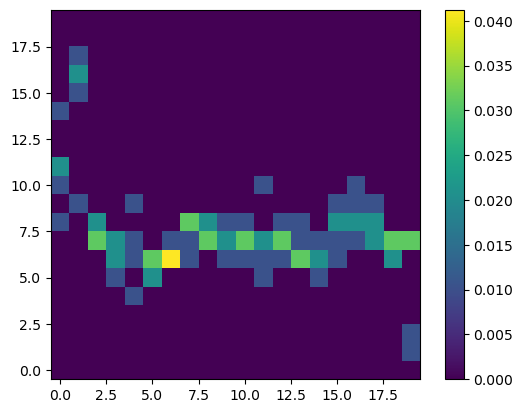

In [9]:
plt.imshow(ratio_list[0], cmap='viridis', origin='lower')
plt.colorbar()
plt.show()

In [41]:
len(ratio_list[0])

30

In [42]:
#save the ground truth list to a pkl file so that it can be easily used in the future
#filename = 'combined_ground_truth.pkl'
#file_path = 'C:\\python_intro\\final_project\\'
#with open(file_path + filename, 'wb') as file:
    #pickle.dump(three_voltages, file)
    #file.close()

In [43]:
#make an empty list for combining all the ratio lists
#combined_ratios = []
#combine the ratio lists together
combined_ratios.extend(ratio_list)
print(len(combined_ratios))

30


## dwell time feature and combine

In [44]:
#merge all the time, pkmax and charge information together
pkmax_list = []
charge_list = []
dwell_time_list = []
for i in range(len(peak_file["PkMax"])):
    pkmax_list.append(float(peak_file["PkMax"][i]))
    charge_list.append(float(area_file["Area"][i]))
    dwell_time_list.append(float(width_file["Width"][i]))

In [45]:
#make an empty list for combining all the data lists
#combined_pkmax_list = []
#combined_charge_list = []
#combined_dwell_time_list = []
#combine the ratio lists together
combined_pkmax_list.extend(pkmax_list)
print(len(combined_pkmax_list))
combined_charge_list.extend(charge_list)
print(len(combined_charge_list))
combined_dwell_time_list.extend(dwell_time_list)
print(len(combined_dwell_time_list))

30
30
30


In [46]:
#for 200
#append more information into the ratio list
flatten_ratios = []
for ratios in combined_ratios:
    flatten_ratios.append(ratios.flatten())
faltten_df = pd.DataFrame(flatten_ratios)
faltten_df[900] = combined_pkmax_list
faltten_df[901] = combined_charge_list
faltten_df[902] = combined_dwell_time_list
# add the numbers 200 to df
voltage_list = [200] * 10 + [300] * 10 + [400] * 10
faltten_df[903] = voltage_list

In [580]:
#300 and 400
#append more information into the ratio list
flatten_ratios = []
for ratios in combined_ratios:
    flatten_ratios.append(ratios.flatten())
faltten_df = pd.DataFrame(flatten_ratios)
faltten_df[900] = combined_pkmax_list
faltten_df[901] = combined_charge_list
faltten_df[902] = combined_dwell_time_list
# add the numbers 300 and 400 to df
voltage_list = [300] * 1000 + [400] * 1000
faltten_df[903] = voltage_list

In [47]:
faltten_df

,0,1,2,3,4,5,6,7,8,9,...,894,895,896,897,898,899,900,901,902,903
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.032303,125.515280,0.00576,200
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.022680,150.513044,0.00702,200
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.040059,131.150086,0.00528,200
3,0.009434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.021362,124.876612,0.00630,200
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.020400,48.842968,0.00252,200
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.033070,168.851626,0.00720,200
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.037900,117.435565,0.00342,200
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.034524,127.615409,0.00438,200
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.017537,25.034966,0.00108,200
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.035671,113.788276,0.00372,200


In [48]:
#faltten_df.to_pickle('testing_events_cnn.pkl')

In [582]:
#read the files for future training
filename = '200mV_900px_combined_des_v2.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    t_combined_ratios = pickle.load(file)
two_k_df = t_combined_ratios.iloc[:1000]
two_k_df

,0,1,2,3,4,5,6,7,8,9,...,894,895,896,897,898,899,900,901,902,903
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020402,164.070624,0.00744,200
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021284,168.319339,0.00792,200
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033509,98.298322,0.00300,200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.025347,119.837057,0.00582,200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020873,142.972899,0.00702,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.022967,156.167515,0.00702,200
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.022861,152.823389,0.00684,200
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027255,149.347144,0.00714,200
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021963,171.121297,0.00816,200


In [583]:
all_combined = pd.concat([two_k_df, faltten_df])
all_combined

,0,1,2,3,4,5,6,7,8,9,...,894,895,896,897,898,899,900,901,902,903
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020402,164.070624,0.00744,200
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021284,168.319339,0.00792,200
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033509,98.298322,0.00300,200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.025347,119.837057,0.00582,200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020873,142.972899,0.00702,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.069144,121.143699,0.00216,400
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048301,165.856277,0.00330,400
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.041053,63.943200,0.00168,400
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.066931,167.935146,0.00312,400


In [584]:
#all_combined.to_pickle("combined_voltage_900px_v2.pkl")

## get the datasets ready

In [ ]:
#read the files for future training
filename = '200mV_combined_ratio_list_50pks.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    combined_ratios = pickle.load(file)

## clusteringgggggggggggggggggggggggg

In [ ]:
flatten_ratios = []
for ratios in combined_ratios:
    flatten_ratios.append(ratios.flatten())

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering to the data for different numbers of clusters
inertias = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k,random_state = 23)
    kmeans.fit(flatten_ratios)
    inertias.append(kmeans.inertia_)

# Plot the within-cluster sum of squares as a function of the number of clusters
plt.plot(range(1, 40), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [ ]:
#read the files for future training
filename = '200mV_combined_current_list.pkl'
file_path = 'C:\\python_intro\\final_project'
with open(file_path + filename, 'rb') as file:
    Two_h_mV_com_current = pickle.load(file)
filename = '200mV_combined_time_list.pkl'
file_path = 'C:\\python_intro\\final_project'
with open(file_path + filename, 'rb') as file:
    Two_h_mV_com_time = pickle.load(file)
#find out which peak has longest time and export its time shape (how many current points)
largest_length = len(max(Two_h_mV_com_current, key=len))
largest_length

#make a list containing all the extended current information
extended_current_list = []
for i in range(len(Two_h_mV_com_current)):
    original_array = Two_h_mV_com_current[i]
    extended_current = np.zeros(largest_length)
    extended_current[:len(original_array)] = original_array
    extended_current_list.append(extended_current)
    
#convert the list into a dataframe for training
ext_current_peaks = pd.DataFrame(extended_current_list)
ext_current_peaks

## normalizing the column for extended features